Fichier ipynb pour faire l'exercice


Partie 1

[    2     4     3     6     4     8     5    10     6    12     7    14
     8    16     9    18    10    20    20    40    30    60    40    80
    50   100    60   120    70   140    80   160    90   180   100   200
   200   400   300   600   400   800   500  1000   600  1200   700  1400
   800  1600   900  1800  1000  2000  2000  4000  3000  6000  4000  8000
  5000 10000]
Nombre de points sur la grille= 2
Nombre de points sur la grille= 4
Nombre de points sur la grille= 3
Nombre de points sur la grille= 6
Nombre de points sur la grille= 4
Nombre de points sur la grille= 8
Nombre de points sur la grille= 5
Nombre de points sur la grille= 10
Nombre de points sur la grille= 6
Nombre de points sur la grille= 12
Nombre de points sur la grille= 7
Nombre de points sur la grille= 14
Nombre de points sur la grille= 8
Nombre de points sur la grille= 16
Nombre de points sur la grille= 9
Nombre de points sur la grille= 18
Nombre de points sur la grille= 10
Nombre de points sur la grille= 20
No

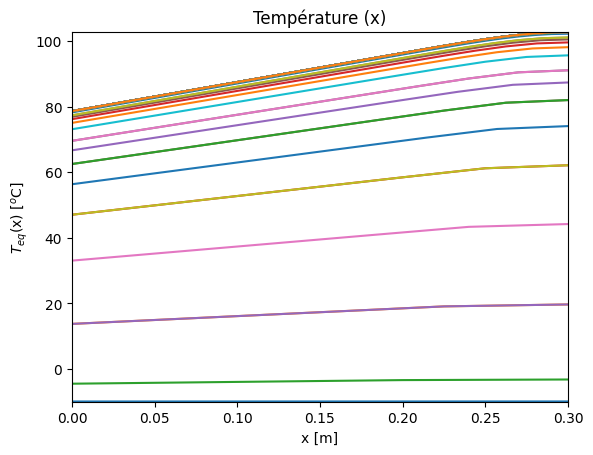

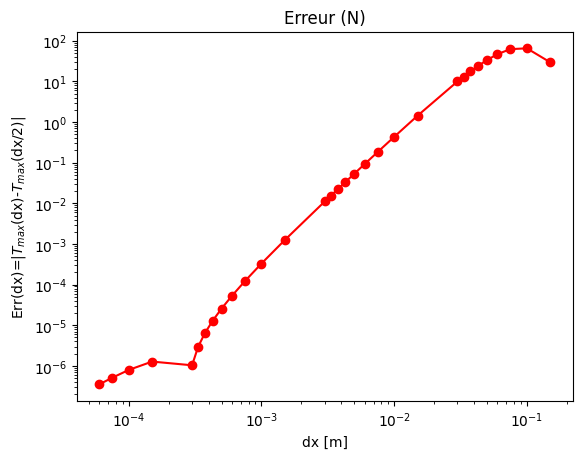

N= 5000 Tmax= 102.7095007963793


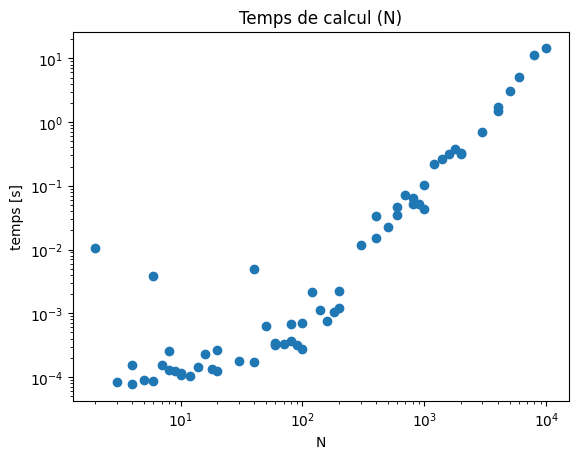

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Équation différentielle: d^2 u/dx^2=g(x) sur x=(a,b)
# Conditions aux limites générales:
# x=a: c1*du/dx+c2*u+c3=0
# x=b: d1*du/dx+d2*u+d3=0

# Équation de transfert de chaleur d^2 T/dx^2=-S(x)/k sur x=(0,L)
# dans un mur d'isolation thermique
L=0.3; #[m] ; Épaisseur du mur

k=1;h=1;
# k=1;#[W/(m*K)]; La conductivité thermique de la brique
# h=1; #[W/(m^2*K)]; Coefficient de transfert thermique pour l'interface plane entre l'air et solide.

# Condition convective (de Robin) à x=0 (face externe du mur): -k*dT/dx=h(Ta-T)
Ta=-10; #[oC]
c1=-k; c2=h; c3=-h*Ta;
# Condition de Neumann à x=L (face interne du mur): dT/dx=0 - flux net de chaleur est 0
d1=1; d2=0; d3=0;

#(N+1) nœuds dans la maille
# Nmax=10000 pour 1G de mémoire

#Nar1=np.array([100]); #dx=3mm
Nar1= np.concatenate((np.arange(2, 11, 1), np.arange(20, 110, 10), np.arange(200, 1100, 100), np.arange(2000, 6000, 1000))); # Matrice pleine
 
Nar=np.zeros(2*Nar1.size,dtype=Nar1.dtype);
Nar[np.arange(0,2*Nar1.size-1,2)]=Nar1.copy();
Nar[np.arange(0,2*Nar1.size-1,2)+1]=2*Nar1.copy();
ci=-1;
Err=np.zeros(Nar1.size,dtype=np.double);
tInv=np.zeros(Nar.size,dtype=np.double);
Tmax=np.zeros(Nar.size,dtype=np.double);

plt.figure(1)
for N in Nar:
    S=np.zeros(N+1,dtype=np.double);
    A=np.zeros((N+1,N+1),dtype=np.double);
    b=np.zeros(N+1,dtype=np.double);
    u=np.zeros(N+1,dtype=np.double);
    
    print('Nombre de points sur la grille=',N);
    ci=ci+1;
    dx=L/N; #Pas de discrétisation
    x=np.linspace(0,L,N+1);
    
    # Sourse volumique de chaleur q[W/m^3] d'épaisseur dL
    # La source est intégrée dans la partie intérieure du mur
    dL=0.05; 
    q=2000; # W/m^3;
    S=q*np.exp(-((x-L)/dL)**2)
    
    # matrice pleine
    A=np.diag(-2*np.ones(N+1),0)+np.diag(np.ones(N),-1)+np.diag(np.ones(N),1);
    
    A[0,0]=2*c2*dx-3*c1;A[0,1]=4*c1;A[0,2]=-c1;
    A[N,N]=3*d1+2*d2*dx;A[N,N-1]=-4*d1;A[N,N-2]=d1;
    b=-S/k*dx**2; b[0]=-2*c3*dx; b[N]=-2*d3*dx;
    
    tic=time.time_ns();
    u=np.linalg.solve(A, b); # Option préférée
#    u=np.linalg.inv(A)@b; # Option gourmande en mémoire
    toc=time.time_ns();
    tInv[ci]=(toc-tic)/1e9; #temps en [s]   
    
    Tmax[ci]=u.max();
    plt.plot(x,u);
    
plt.axis([x[0], x[-1], Ta, Tmax.max()])
plt.title('Température (x)')
plt.xlabel('x [m]')    
plt.ylabel('$T_{eq}$(x) [$^o$C]')
plt.show()

Err=np.abs(Tmax[np.arange(0,Tmax.size,2)]-Tmax[np.arange(1,Tmax.size,2)]);
plt.figure(2)
plt.plot(L/Nar1,Err,'-or');
plt.xscale('log')
plt.yscale('log')
plt.title('Erreur (N)')
plt.xlabel('dx [m]')
plt.ylabel('Err(dx)=|$T_{max}$(dx)-$T_{max}$(dx/2)|')
plt.show()

plt.figure(3)
plt.loglog(Nar,tInv,'o')
plt.title('Temps de calcul (N)')
plt.xlabel('N')
plt.ylabel('temps [s]')

Tmax_eq=Tmax[-2];
print('N=',Nar1[-1],'Tmax=',Tmax_eq)

Partie 2